<a href="https://colab.research.google.com/github/sepehrshahbeik/daneshkar-tennis-project/blob/main/Tennis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd

In [51]:
data_match = pd.read_csv("raw_match_parquet_combined.csv")
data_odds = pd.read_csv("raw_odds_parquet_combined.csv")
data_statistics = pd.read_csv("raw_statistics_parquet_combined.csv")
data_raw_tennis = pd.read_csv("raw_tennis_power_parquet_combined.csv")
data_raw_votes = pd.read_csv("raw_votes_parquet_combined.csv")
data_raw_point = pd.read_csv("raw_point_by_point_parquetــcombined.csv")

/tmp/ipython-input-3456937643.py:1: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data_match = pd.read_csv("raw_match_parquet_combined.csv")


In [52]:
data_match.head()

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,...,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type,city,stadium,venue_id
0,11998445,Auger-Aliassime F.,auger-aliassime-felix,M,23318.0,"Monte Carlo, Monaco","Montreal, Canada",1.93,87.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11998446,Cobolli F.,flavio-cobolli,M,5995.0,Rome,"Florence, Italy",1.83,71.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11998447,Martínez P.,martinez-pedro,M,2621.0,"Valencia, Spain","Alzira, Spain",1.85,76.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11998448,Muller A.,muller-alexandre,M,2443.0,France,"Poissy, France",1.83,73.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11998449,Mayot H.,mayot-harold,M,1492.0,"Marly, France","Metz, France",1.78,78.0,right-handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Q1: How many tennis players are included in the dataset?

In [53]:
data_match["name"].nunique()

2933

In [54]:
data_match["player_id"].nunique()

2644

# Q2: What is the average height of the players?

In [55]:
data_match['height'].mean()

np.float64(1.8230601916657692)

# Q3: Which player has the highest number of wins?

In [56]:
data_match_selected = data_match[['player_id', 'match_id']]
data_odds_selected = data_odds[['winnig', 'match_id']]

# ادغام داده‌ها بر اساس match_id
merged_data = pd.merge(data_match_selected, data_odds_selected, on='match_id', how='inner')

# نمایش 5 ردیف اول
print(merged_data.head())

# فیلتر کردن داده‌ها برای ردیف‌هایی که مقدار winnig برابر با True دارند
wins_data = merged_data[merged_data['winnig'] == True]

# شمارش تعداد دفعات True برای هر player_id
wins_by_player = wins_data['player_id'].value_counts()

# پیدا کردن player_id با بیشترین تعداد True
most_wins_player_id = wins_by_player.idxmax()
most_wins_count = wins_by_player.max()

print(f"Player with the highest number of wins: {most_wins_player_id} with {most_wins_count} wins")

# پیدا کردن full_name مربوط به player_id با بیشترین برد
most_wins_player_name = data_match[data_match['player_id'] == most_wins_player_id]['full_name'].iloc[0]

print(f"Player with the highest number of wins: {most_wins_player_name}")

   player_id  match_id winnig
0   192013.0  11998445  False
1   192013.0  11998445   True
2   192013.0  11998445  False
3   192013.0  11998445   True
4   192013.0  11998445   True
Player with the highest number of wins: 58515.0 with 304 wins
Player with the highest number of wins: Collins, Danielle


# Q5: How many sets are typically played in a tennis match?

In [57]:
sets_per_match = data_raw_tennis.groupby('match_id')['set_num'].nunique()

# محاسبه میانگین تعداد ست‌ها
average_sets = sets_per_match.mean()

print(f"Typically, {average_sets:.2f} sets are played in a tennis match.")

Typically, 2.29 sets are played in a tennis match.


# Q6: Which country has produced the most successful tennis players?

In [58]:
# انتخاب ستون‌های مورد نیاز از هر دیتافریم
data_match_selected = data_match[['match_id', 'country']]
data_odds_selected = data_odds[['match_id', 'winnig']]

# ادغام داده‌ها بر اساس match_id
merged_data = pd.merge(data_match_selected, data_odds_selected, on='match_id', how='inner')

# بررسی جدول ساخته شده
print(merged_data.head())

# فیلتر کردن داده‌ها برای ردیف‌هایی که winnig برابر با True است
successful_matches = merged_data[merged_data['winnig'] == True]

# شمارش تعداد True ها برای هر کشور
country_wins = successful_matches['country'].value_counts()

# پیدا کردن کشور با بیشترین تعداد برد
most_successful_country = country_wins.idxmax()
most_successful_country_wins = country_wins.max()

print(f"The country that has produced the most successful tennis players: {most_successful_country} with {most_successful_country_wins} wins")

   match_id country winnig
0  11998445  Canada  False
1  11998445  Canada   True
2  11998445  Canada  False
3  11998445  Canada   True
4  11998445  Canada   True
The country that has produced the most successful tennis players: USA with 17346 wins


# Q7: What is the average number of aces per match?

In [59]:

# فیلتر کردن داده‌ها: فقط ردیف‌هایی که 'period' برابر 'ALL' و 'statistic_name' برابر 'aces' باشند و home_value و away_value بزرگتر از صفر باشند
aces = data_statistics.query("period == 'ALL' & statistic_name == 'aces' & home_value > 0 & away_value > 0").copy()

# محاسبه مجموع آس‌ها
aces["total_aces"] = aces["home_value"] + aces["away_value"]

# محاسبه میانگین تعداد آس‌ها برای تمامی مسابقات
total_aces_average = aces["total_aces"].mean()
print(f"Average number of aces per match: {total_aces_average:.2f}")

# گروه‌بندی بر اساس match_id و محاسبه میانگین آس‌ها برای هر مسابقه
total_aces_count = aces.groupby("match_id")["total_aces"].mean().reset_index()

# تغییر نام ستون‌ها به match_id و total_aces
total_aces_count.columns = ["match_id", "total_aces"]

# نمایش نتیجه
print(total_aces_count.head())  # نمایش 5 ردیف اول از نتیجه

Average number of aces per match: 8.19
   match_id  total_aces
0  11998445        18.0
1  11998446         9.0
2  11998447        12.0
3  11998449        10.0
4  11998450        26.0


# Q8:Is there a difference in the number of double faults based on gender?

In [60]:
statistics_filtered = data_statistics[
    (data_statistics['period'] == 'ALL') &
    (data_statistics['statistic_name'] == 'double_faults')
][['match_id', 'period', 'statistic_name', 'home_stat', 'away_stat']]

# جمع کردن home_stat و away_stat
statistics_filtered['total_double_faults'] = statistics_filtered['home_stat'] + statistics_filtered['away_stat']

# انتخاب ستون‌های مورد نیاز از data_match
data_match_selected = data_match[['match_id', 'gender']]

# ادغام داده‌ها بر اساس match_id
merged_data = pd.merge(data_match_selected, statistics_filtered, on='match_id', how='inner')

# انتخاب فقط ستون‌های مورد نیاز
final_data = merged_data[['match_id', 'gender', 'period', 'statistic_name', 'total_double_faults']]

# نمایش 5 ردیف اول از نتیجه
print(final_data.head())

# تبدیل مقادیر غیر عددی به NaN (برای جلوگیری از مشکل چسبیدن رشته‌ها)
final_data['total_double_faults'] = pd.to_numeric(final_data['total_double_faults'], errors='coerce')

# گروه‌بندی داده‌ها بر اساس جنسیت و محاسبه مجموع total_double_faults برای هر جنسیت
gender_faults = final_data.groupby('gender')['total_double_faults'].sum()

# نمایش مجموع double_faults برای هر جنسیت
print(f"Total double faults for males (M): {gender_faults['M']}")
print(f"Total double faults for females (F): {gender_faults['F']}")

   match_id gender period statistic_name total_double_faults
0  11998445      M    ALL  double_faults                  27
1  11998445      M    ALL  double_faults                  27
2  11998446      M    ALL  double_faults                  21
3  11998446      M    ALL  double_faults                  21
4  11998447      M    ALL  double_faults                  05
Total double faults for males (M): 1653316
Total double faults for females (F): 2086782


/tmp/ipython-input-4050651764.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['total_double_faults'] = pd.to_numeric(final_data['total_double_faults'], errors='coerce')


# Q10: Is there a correlation between a player's height and their ranking?

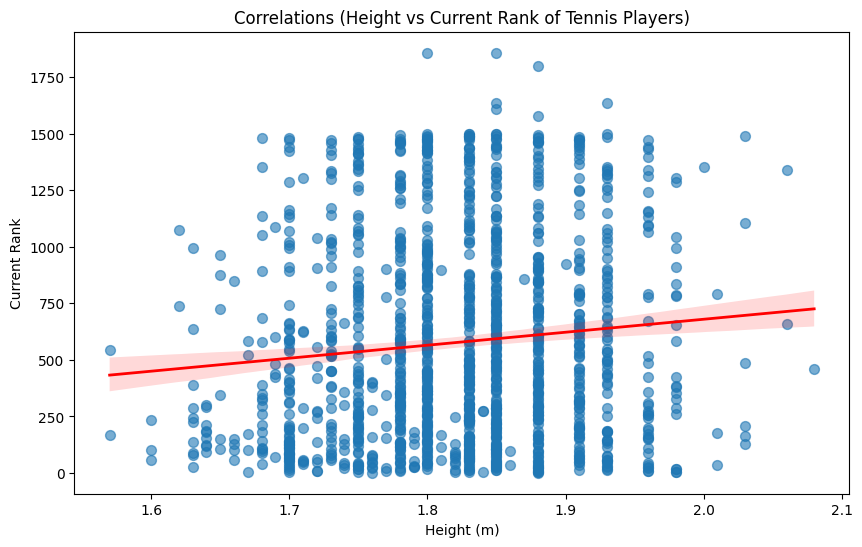

Correlation between height and current rank: 0.103


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

#data_match[['match_id', 'player_id', 'height', 'current_rank']].head()

# یونیک کردن player_id
unique_players = data_match.drop_duplicates(subset='player_id')

plt.figure(figsize=(10,6))

# scatter plot همراه با خط رگرسیون برای تحلیل
sns.regplot(
    data=unique_players,
    x='height',
    y='current_rank',
    scatter_kws={'s':50, 'alpha':0.6},  # اندازه و شفافیت نقاط
    line_kws={'color':'red', 'lw':2}     # خط رگرسیون
)

plt.title('Correlations (Height vs Current Rank of Tennis Players)')
plt.xlabel('Height (m)')
plt.ylabel('Current Rank')
plt.show()

# correlation بین height و current_rank
correlation = unique_players['height'].corr(unique_players['current_rank'])
print(f"Correlation between height and current rank: {correlation:.3f}")


# Q12: What is the average number of games per set in men's matches compared to women's matches?

In [62]:
# انتخاب و پاکسازی ستون‌ها
points = data_raw_point[['match_id', 'game_id', 'set_id']].drop_duplicates()
gender = data_match[['match_id', 'gender']].dropna()

# محاسبه تعداد بازی‌ها در هر ست و ادغام با جنسیت
games_per_set = (points.groupby(['match_id', 'set_id'])
                 .size()
                 .reset_index(name='total_games'))
games_per_set = games_per_set.merge(gender, on='match_id', how='left')

# محاسبه میانگین بازی‌ها بر اساس جنسیت و اختلاف درصدی
avg_games = games_per_set.groupby('gender')['total_games'].mean()
difference = (avg_games.max() - avg_games.min()) / ((avg_games.max() + avg_games.min()) / 2) * 100

print(f'The difference in the average number of games per set between Males and females is %{difference:.3f}')

The difference in the average number of games per set between Males and females is %4.119


# Q13: What is the distribution of left-handed versus right-handed players?

Top 10 countries with most right-handed players:
            country         plays  total_players
45           France  right-handed             98
115             USA  right-handed             87
62            Italy  right-handed             61
6         Australia  right-handed             49
94           Russia  right-handed             46
49          Germany  right-handed             43
65            Japan  right-handed             39
4         Argentina  right-handed             39
104           Spain  right-handed             36
118  United Kingdom  right-handed             35

Top 10 countries with most left-handed players:
            country        plays  total_players
114             USA  left-handed             13
44           France  left-handed             11
61            Italy  left-handed             10
48          Germany  left-handed              9
64            Japan  left-handed              8
93           Russia  left-handed              7
103           Spain  left-h

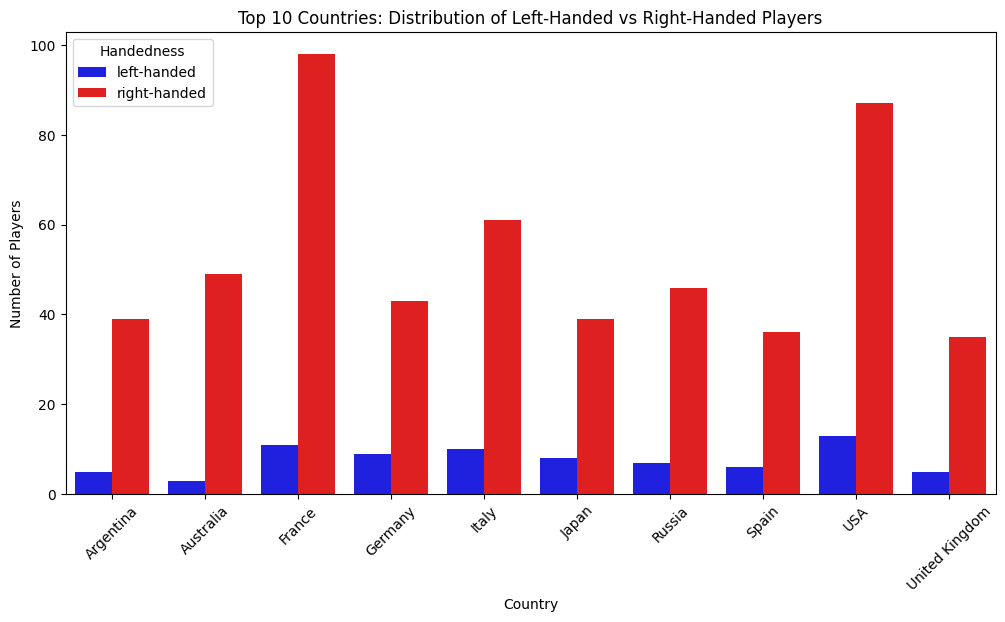

In [63]:
# انتخاب ستون‌های مورد نیاز و حذف مقادیر خالی
hand_country = data_match[['country', 'plays', 'player_id']].dropna()

# فیلتر بازیکنان چپ‌دست و راست‌دست و گروه‌بندی بر اساس کشور و دست غالب
hand_country_modified = (
    hand_country.query("plays == 'right-handed' or plays == 'left-handed'")
    .groupby(['country', 'plays'])
    .agg(total_players=('player_id', 'nunique'))
    .reset_index()
    .sort_values(by='total_players', ascending=False)
)

# استخراج 10 کشور اول برای هر دست غالب
right_handed_players = hand_country_modified.query("plays == 'right-handed'").head(10)
left_handed_players = hand_country_modified.query("plays == 'left-handed'").head(10)

# نمایش نتایج
print("Top 10 countries with most right-handed players:")
print(right_handed_players)
print("\nTop 10 countries with most left-handed players:")
print(left_handed_players)

# انتخاب و پاکسازی ستون‌ها
hand_country = data_match[['country', 'plays', 'player_id']].dropna()
hand_country = hand_country.query("plays == 'right-handed' or plays == 'left-handed'")

# شمارش بازیکنان منحصر به فرد بر اساس کشور و دست غالب
hand_country_count = (
    hand_country.groupby(['country', 'plays'])
    .agg(total_players=('player_id', 'nunique'))
    .reset_index()
)

# انتخاب مثلا 10 کشور برتر بر اساس تعداد کل بازیکنان
top_countries = (hand_country_count.groupby('country')['total_players']
                 .sum()
                 .sort_values(ascending=False)
                 .head(10)
                 .index)

hand_country_top = hand_country_count[hand_country_count['country'].isin(top_countries)]

# رسم نمودار
plt.figure(figsize=(12,6))
sns.barplot(data=hand_country_top, x='country', y='total_players', hue='plays', palette=['#0000ff','#ff0000'])
plt.title('Top 10 Countries: Distribution of Left-Handed vs Right-Handed Players')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.legend(title='Handedness')
plt.show()

# Q14: What is the most common type of surface used in tournaments?